In [8]:
import tensorflow as tf
path = "C:/VIN_PYCHARM/ONE/Data/mnist.npz"

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs['accuracy'] >0.99):
            print("\nReached 99% accuracy, stopping training")
            self.model.stop_training = True

In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train/255.0
x_test  = x_test/255.0

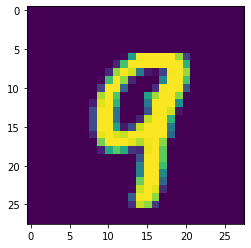

In [14]:
import numpy as np
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt
plt.imshow(x_train[800])


In [20]:
callback = myCallback()

model = tf.keras.models.Sequential()
model.add (tf.keras.layers.Flatten(input_shape=(28,28)))
model.add (tf.keras.layers.Dense(512,activation='relu'))
model.add (tf.keras.layers.Dense(10,activation='softmax'))



In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
model.fit(x_train,y_train, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1981 - accuracy: 0.9418

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9806

[0.07092218101024628, 0.9805999994277954]

In [25]:
classifications = model.predict(x_test)


In [26]:
def IndexOfMax(a):
    arr = np.array(a)
    result = np.where(arr == np.amax(arr))
    print("Predicted Type =", result[0][0])

Label= 1
Predicted Type = 1
Label= 5
Predicted Type = 5
Label= 5
Predicted Type = 5
Label= 6
Predicted Type = 6
Label= 1
Predicted Type = 1
Label= 8
Predicted Type = 8
Label= 5
Predicted Type = 5
Label= 1
Predicted Type = 1
Label= 7
Predicted Type = 7
Label= 9
Predicted Type = 9


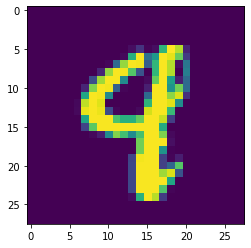

In [30]:
for i in range(350,360):
    plt.imshow(x_test[i])
    print("Label=", y_test[i])
    IndexOfMax(classifications[i])
